<a href="https://colab.research.google.com/github/askholani/PCVK_M_1/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Praktikum Pertemuan 7**

Nama: Ibnu Hajar Askholani

NIM: 2141720170

Kelas: TI-3C

### **PRAKTIKUM FILTER**

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.




2. Berikut merupakan langkah-langkah yang dapat dilakukan:

  a.Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.

  b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan.
  

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Mounted at /content/drive


  c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

  Langkah-langkah membuat konvolusi tanpa library

  1. citra masukan.

  2. kernel berupa matrix untuk memfilter citra.

  3. nilai stride / besarnya pergeseran untuk setiap

  4. nilai pad yang akan ditamabahkan pada citra

*   Load citra yang akan diproses dan ubah menjadi citra keabuan





*   Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:




*   Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:




In [ ]:
def convolution2d(image, kernel, stride, padding):

  # menambahkan padding ke citra input sesuai dengan nilai padding yang diberikan.
  # Padding : menambahkan piksel-piksel tambahan di sekitar citra.
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape # mengambil tinggi dan lebar kernel yang digunakan untuk konvolusi.
  padded_height, padded_width = image.shape # mengambil tinggi dan lebar citra setelah padding.

  # menghitung tinggi dan lebar citra hasil konvolusi
  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32) # membuat citra baru yang akan menampung hasil konvolusi

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

D. Load citra yang akan di proses dan ubah menjadi citra keabuan

In [ ]:
img_m = cv.imread('/content/drive/MyDrive/content/Images/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

E. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut

In [ ]:
# image sharpen
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

F. Memanggil fungsi konvulsi yang telah dibuat sebelumnya dan menampilkan hasil konvolusinya :

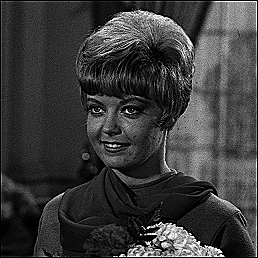

In [ ]:
result = convolution2d(img_gray,kernel_sharpen,1,2)
cv2_imshow(result)

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

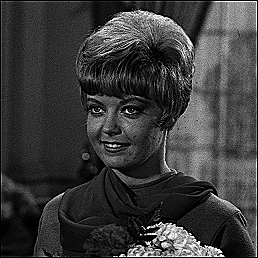

In [ ]:
# SHARPEN
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

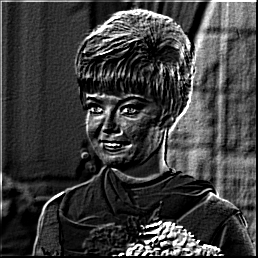

In [ ]:
# EMBOS
kernel_embos = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, kernel_embos, 1, 2))

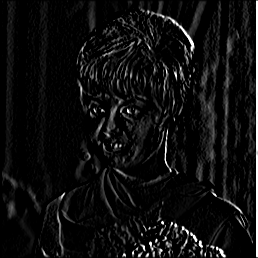

In [ ]:
# Left Sobel Edge Detection
kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

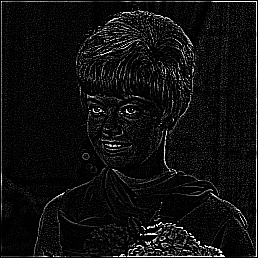

In [ ]:
# Canny edge Detection
kernel_edge = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

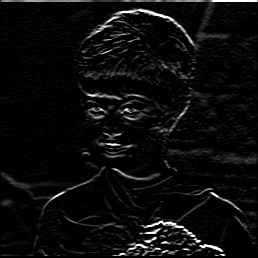

In [ ]:
# Prewitt Edge Detection
kernel_prewitt= np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

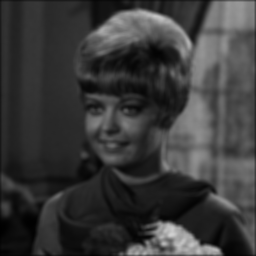

In [ ]:
# 5x5 Gaussian Blur
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss= gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, kernel_gauss, 1, 2))

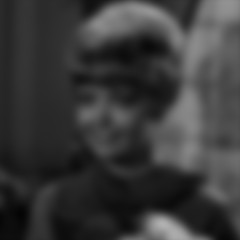

In [ ]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

Tugas

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

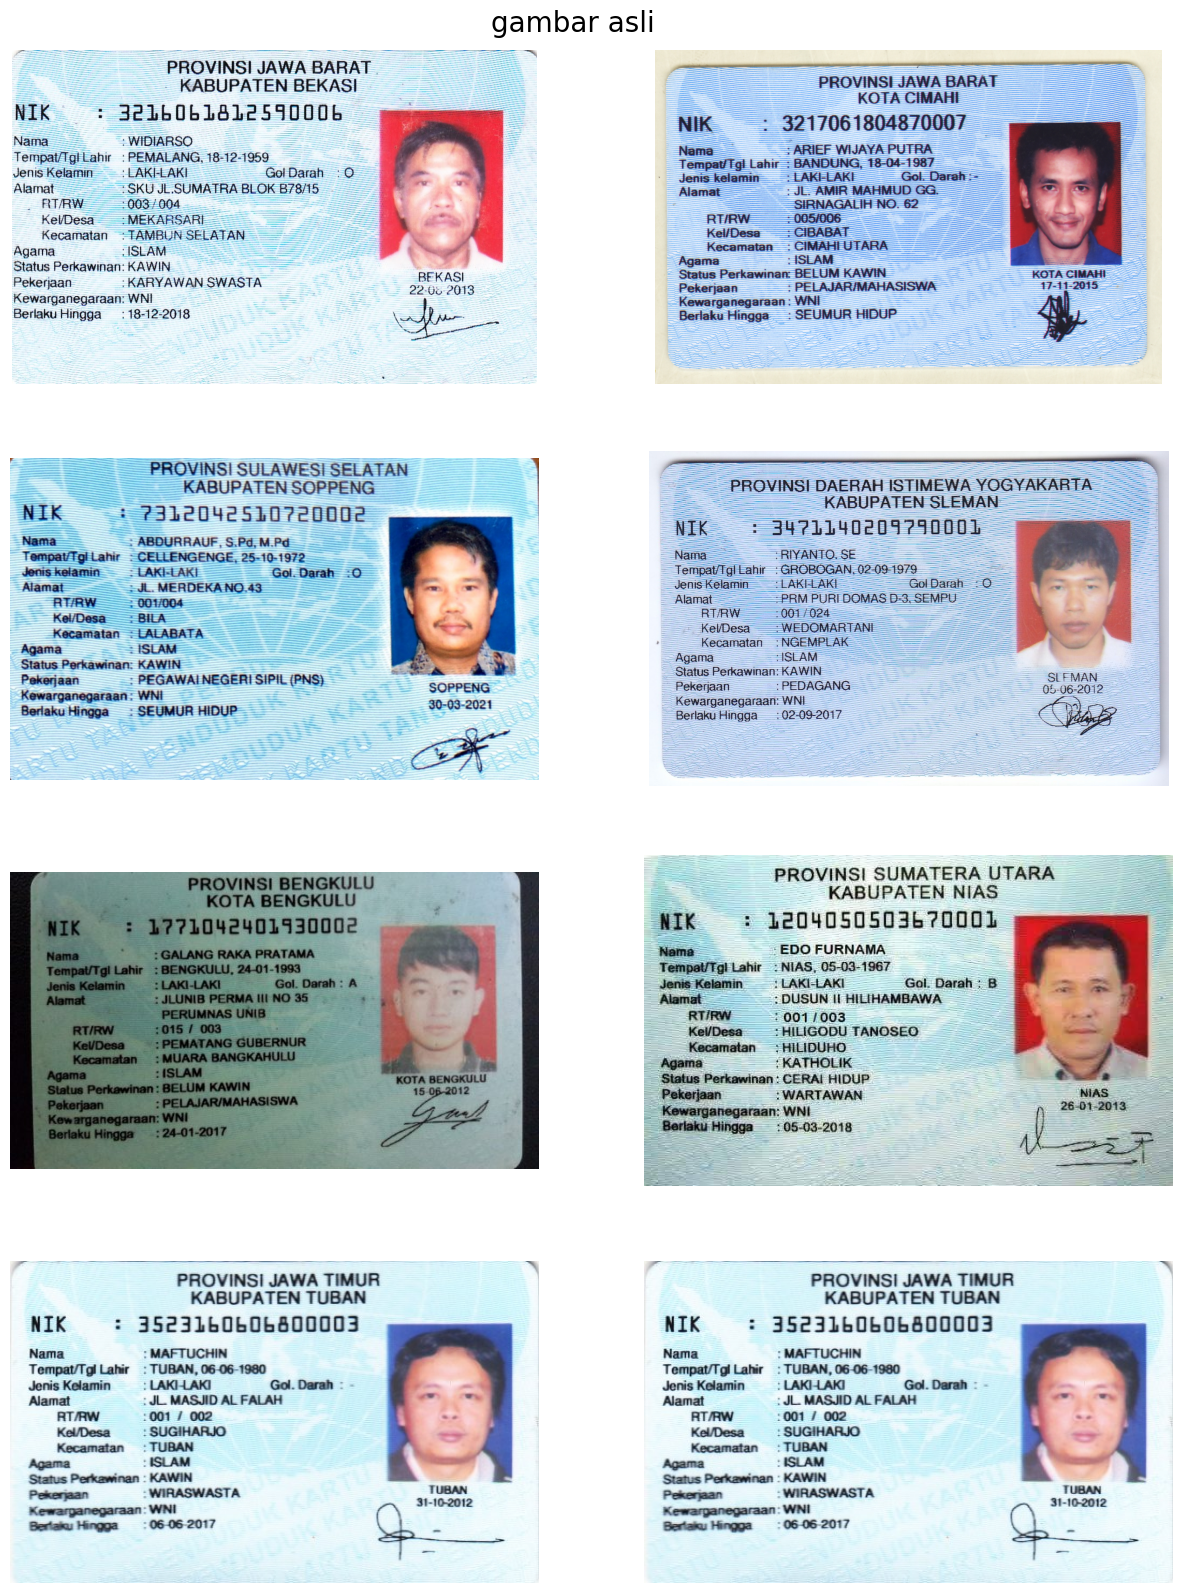

In [57]:
import cv2
import glob
from matplotlib import pyplot as plt

# original = cv2.imread('/content/drive/MyDrive/content/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/content/week7/KTP_More/*'):
    n = cv2.imread(img)
    cv_img.append(n)

# Menghitung jumlah total gambar
total_images = len(cv_img)

# Mengatur jumlah kolom dalam grid (dalam hal ini, 2 gambar per baris)
columns = 2
# Menghitung jumlah baris yang diperlukan
rows = (total_images + columns - 1) // columns

# Membuat tampilan dengan ukuran sesuai
plt.figure(figsize=(15, 5 * rows))
# figsize (lebar,tinggi)

for i, image in enumerate(cv_img):
    plt.subplot(rows, columns, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.suptitle('gambar asli', fontsize=20,y=0.9)
plt.show()


